# Proyek Analisis Data: E-commerce Public Dataset
- **Nama:** Fayshal Karan Athilla
- **Email:** fayshalathilla@gmail.com
- **ID Dicoding:** fayshalkaran97

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Kategori produk apa yang menyumbangkan pendapatan (revenue) terbesar bagi platform selama periode tahun 2017 hingga 2018?
- Pertanyaan 2: Di negara bagian (state) mana konsentrasi pelanggan terbanyak berada pada akhir tahun 2018?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("customers_dataset.csv")
orders_df = pd.read_csv("orders_dataset.csv")
order_items_df = pd.read_csv("order_items_dataset.csv")
order_payments_df = pd.read_csv("order_payments_dataset.csv")
order_reviews_df = pd.read_csv("order_reviews_dataset.csv")
products_df = pd.read_csv("products_dataset.csv")
sellers_df = pd.read_csv("sellers_dataset.csv")
category_translation_df = pd.read_csv("product_category_name_translation.csv")
geolocation_df = pd.read_csv("geolocation_dataset.csv")

In [3]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [10]:
category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### Insight:
Terdapat 9 dataset yang digunakan, yaitu:
1. customers_dataset
2. geolocation_dataset
3. order_items_dataset
4. order_payments_dataset
5. order_reviews_dataset
6. orders_dataset
7. product_category_name_translation
8. products_dataset
9. sellers_dataset

### Assessing Data

#### customers_df

In [12]:
print("--- Info Customers ---")
print(customers_df.info())

print("\n--- Missing Values in Customers ---")
print(customers_df.isna().sum())

print("\n--- Duplicate Data in Customers ---")
print(customers_df.duplicated().sum())

print("\n--- Descriptive Statistics for Customers ---")
print(customers_df.describe())

--- Info Customers ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

--- Missing Values in Customers ---
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

--- Duplicate Data in Customers ---
0

--- Descriptive Statistics for Customers ---
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 100

#### orders_df

In [13]:
print("--- Info Orders ---")
print(orders_df.info())

print("\n--- Missing Values in Orders ---")
print(orders_df.isna().sum())

print("\n--- Duplicate Data in Orders ---")
print(orders_df.duplicated().sum())

print("\n--- Descriptive Statistics for Orders ---")
print(orders_df.describe())

--- Info Orders ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

--- Missing Values in Orders ---
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_deliver

#### order_items_df

In [14]:
print("--- Info Order Items ---")
print(order_items_df.info())

print("\n--- Missing Values in Order Items ---")
print(order_items_df.isna().sum())

print("\n--- Duplicate Data in Order Items ---")
print(order_items_df.duplicated().sum())

print("\n--- Descriptive Statistics for Order Items ---")
print(order_items_df.describe())

--- Info Order Items ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None

--- Missing Values in Order Items ---
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

--- Duplicate Data in Order Items ---
0

--- Descriptive Statistics for Order Items ---
       order_item_id   

#### order_payments_df

In [15]:
print("--- Info Order Payments ---")
print(order_payments_df.info())

print("\n--- Missing Values in Order Payments ---")
print(order_payments_df.isna().sum())

print("\n--- Duplicate Data in Order Payments ---")
print(order_payments_df.duplicated().sum())

print("\n--- Descriptive Statistics for Order Payments ---")
print(order_payments_df.describe())

--- Info Order Payments ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None

--- Missing Values in Order Payments ---
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

--- Duplicate Data in Order Payments ---
0

--- Descriptive Statistics for Order Payments ---
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679

#### order_reviews_df

In [16]:
print("--- Info Order Reviews ---")
print(order_reviews_df.info())

print("\n--- Missing Values in Order Reviews ---")
print(order_reviews_df.isna().sum())

print("\n--- Duplicate Data in Order Reviews ---")
print(order_reviews_df.duplicated().sum())

print("\n--- Descriptive Statistics for Order Reviews ---")
print(order_reviews_df.describe())

--- Info Order Reviews ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None

--- Missing Values in Order Reviews ---
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

--- Duplicate Data in Order Reviews ---
0

--- 

#### products_df

In [17]:
print("--- Info Products ---")
print(products_df.info())

print("\n--- Missing Values in Products ---")
print(products_df.isna().sum())

print("\n--- Duplicate Data in Products ---")
print(products_df.duplicated().sum())

print("\n--- Descriptive Statistics for Products ---")
print(products_df.describe())

--- Info Products ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None

--- Missing Values in Products ---
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos

#### sellers_df

In [18]:
print("--- Info Sellers ---")
print(sellers_df.info())

print("\n--- Missing Values in Sellers ---")
print(sellers_df.isna().sum())

print("\n--- Duplicate Data in Sellers ---")
print(sellers_df.duplicated().sum())

print("\n--- Descriptive Statistics for Sellers ---")
print(sellers_df.describe())

--- Info Sellers ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None

--- Missing Values in Sellers ---
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

--- Duplicate Data in Sellers ---
0

--- Descriptive Statistics for Sellers ---
       seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.0

#### category_translation_df

In [19]:
print("--- Info Category Translation ---")
print(category_translation_df.info())

print("\n--- Missing Values in Category Translation ---")
print(category_translation_df.isna().sum())

print("\n--- Duplicate Data in Category Translation ---")
print(category_translation_df.duplicated().sum())

print("\n--- Descriptive Statistics for Category Translation ---")
print(category_translation_df.describe())

--- Info Category Translation ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None

--- Missing Values in Category Translation ---
product_category_name            0
product_category_name_english    0
dtype: int64

--- Duplicate Data in Category Translation ---
0

--- Descriptive Statistics for Category Translation ---
       product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1


#### geolocation_df

In [20]:
print("--- Info Category Geo Location ---")
print(geolocation_df.info())

print("\n--- Missing Values in Category Geo Location ---")
print(geolocation_df.isna().sum())

print("\n--- Duplicate Data in Category Geo Location ---")
print(geolocation_df.duplicated().sum())

print("\n--- Descriptive Statistics for Geo Location ---")
print(geolocation_df.describe())

--- Info Category Geo Location ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None

--- Missing Values in Category Geo Location ---
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

--- Duplicate Data in Category Geo Location ---
261831

--- Descriptive Statistics for Geo Location ---
       geolocation_zip_code_prefi

#### **Insight:**
- Berikut detail informasi setiap dataset:
    1. customers_dataset
        *   Jumlah Data: 99440
        *   Jumlah Kolom: 5
            * `customer_id`
            * `customer_unique_id`
            * `customer_zip_code_prefix`
            * `customer_city`
            * `customer_state`
    2. geolocation_dataset
        *   Jumlah Data: 1000162
        *   Jumlah Kolom: 5
            * `geolocation_zip_code_prefix`
            * `geolocation_lat`
            * `geolocation_lng`
            * `geolocation_city`
            * `geolocation_state`
    3. order_items_dataset
        *   Jumlah Data: 112649
        *   Jumlah Kolom: 7
              * `order_id`
              * `order_item_id`
              * `product_id`
              * `seller_id`
              * `shipping_limit_date`
              * `price`
              * `freight_value`
    4. order_payments_dataset
        *   Jumlah Data: 103885
        *   Jumlah Kolom: 5
              * `order_id`
              * `payment_sequential`
              * `payment_installments`
              * `payment_value`
              * `payment_type`
    5. order_reviews_dataset
        *   Jumlah Data: 99223
        *   Jumlah Kolom: 7
              * `order_id`
              * `review_id`
              * `review_score`
              * `review_comment_title`
              * `review_comment_message`
              * `review_creation_date`
              * `review_answer_timestamp`
    6. orders_dataset
        *   Jumlah Data: 99440
        *   Jumlah Kolom: 8
              * `order_id`
              * `customer_id`
              * `order_status`
              * `order_purchase_timestamp`
              * `order_approved_at`
              * `order_delivered_carrier_date`
              * `order_delivered_customer_date`
              * `order_estimated_delivery_date`
    7. product_category_name_translation
        *   Jumlah Data: 70
        *   Jumlah Kolom: 2
              * `product_category_name`
              * `product_category_name_english`
    8. products_dataset
        *   Jumlah Data: 32950
        *   Jumlah Kolom: 9
              * `product_id`
              * `product_category_name`
              * `product_name_lenght`
              * `product_description_lenght`
              * `product_photos_qty`
              * `product_weight_g`
              * `product_length_cm`
              * `product_height_cm`
              * `product_width_cm`
    9. sellers_dataset
        *   Jumlah Data: 3094
        *   Jumlah Kolom: 4
              * `seller_id`
              * `seller_zip_code_prefix`
              * `seller_city`
              * `seller_state`

- Banyak kolom tanggal (seperti di tabel `orders`, `order_items`, dan `order_reviews`) masih bertipe `object`. Harus kita ubah ke `datetime`

- pada tabel `products`, terdapat 610 data tanpa kategori. Agar kita mengisinya dengan "others" agar tidak hilang saat di-*merge*  

- Pada tabel `orders`, nilai kosong di kolom pengiriman adalah wajar (pesanan mungkin belum sampai), jadi kita biarkan.

- Tabel `geolocation` memiliki banyak sekali duplikat (261.831 data). Kita harus menghapusnya untuk menghemat memori dan menjaga akurasi analisis.

### Cleaning Data

#### Konversi Kolom Tanggal (Datetime)

In [21]:
# Kolom pada tabel orders
datetime_orders = [
    'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in datetime_orders:
    orders_df[col] = pd.to_datetime(orders_df[col])

# Kolom pada tabel order_items
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

# Kolom pada tabel order_reviews
datetime_reviews = ['review_creation_date', 'review_answer_timestamp']
for col in datetime_reviews:
    order_reviews_df[col] = pd.to_datetime(order_reviews_df[col])

#### Menangani Missing Values di Tabel Products

In [22]:
# Kita isi kategori yang kosong dengan 'unknown' atau 'others'
products_df['product_category_name'].fillna('others', inplace=True)
# Untuk kolom numerik (dimensi/berat), kita bisa isi dengan median atau 0
products_df.fillna(0, inplace=True)

/tmp/ipython-input-2544121207.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna('others', inplace=True)


#### Menghapus Duplikat di Tabel Geolocation

In [23]:
geolocation_df.drop_duplicates(inplace=True)

#### Verifikasi Akhir

In [24]:
print("--- Pembersihan Selesai ---")
print(f"Jumlah duplikat Geolocation sekarang: {geolocation_df.duplicated().sum()}")
print(f"Tipe data order_purchase_timestamp: {orders_df['order_purchase_timestamp'].dtype}")

--- Pembersihan Selesai ---
Jumlah duplikat Geolocation sekarang: 0
Tipe data order_purchase_timestamp: datetime64[ns]


#### **Insight:**
- Jumlah duplikat pada `geolocation_df` sekarang adalah 0
- Tipe data `order_purchase_timestamp` (tabel `orders`, `order_items`, dan `order_reviews`) sudah dibuah diubah menjadi `datetime64`

## Exploratory Data Analysis (EDA)

### Analisis Univariat

#### Distribusi Data Numerik (Histogram)


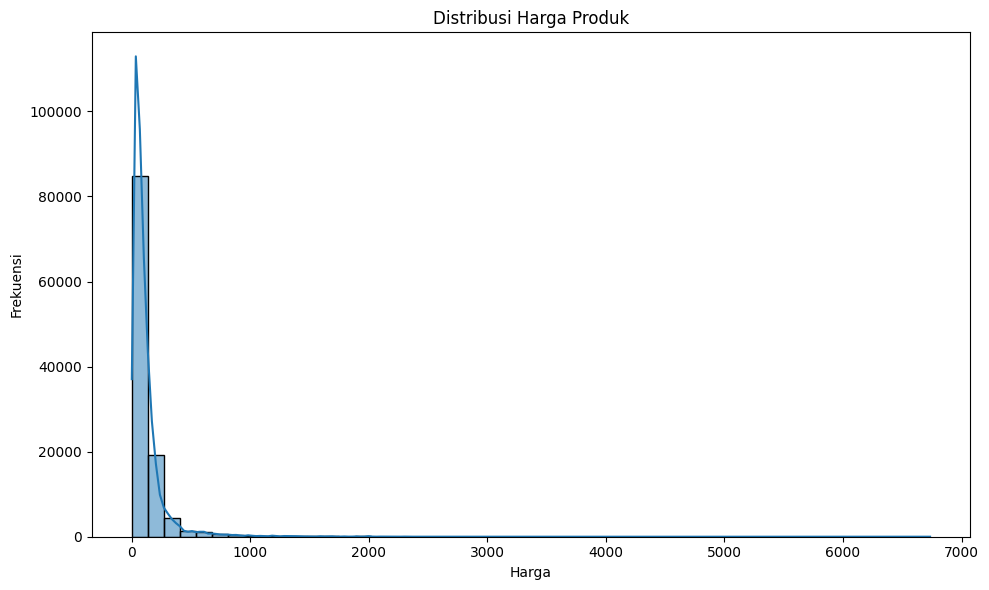

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(order_items_df['price'], bins=50, kde=True)
plt.title('Distribusi Harga Produk')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

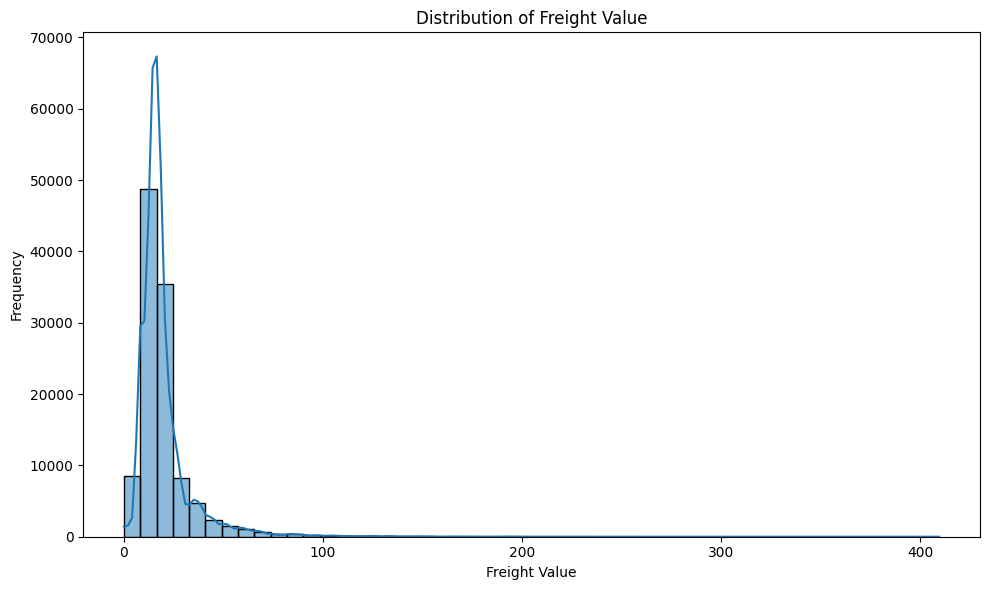

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(order_items_df['freight_value'], bins=50, kde=True)
plt.title('Distribution of Freight Value')
plt.xlabel('Freight Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

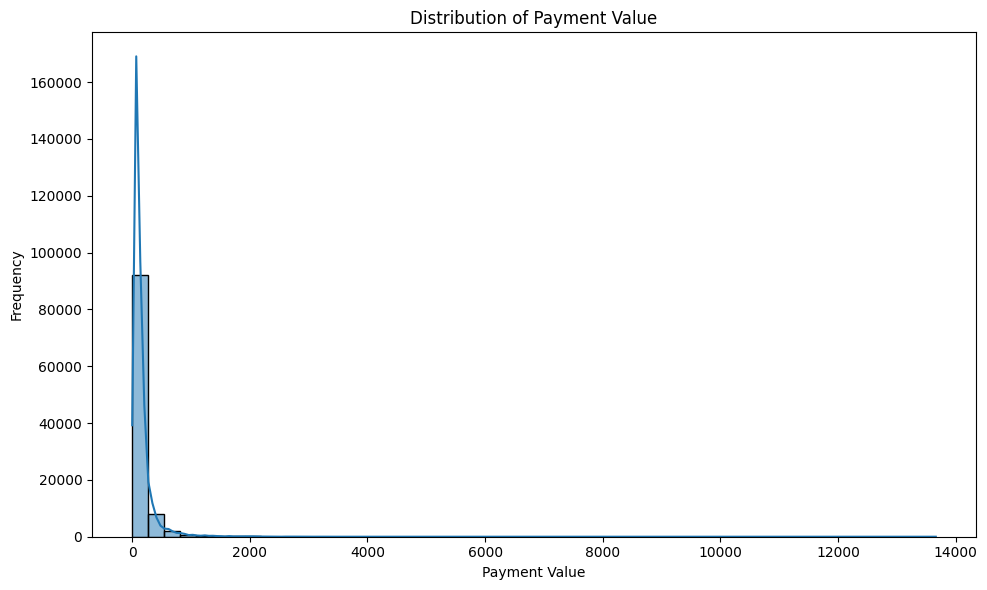

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(order_payments_df['payment_value'], bins=50, kde=True)
plt.title('Distribution of Payment Value')
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

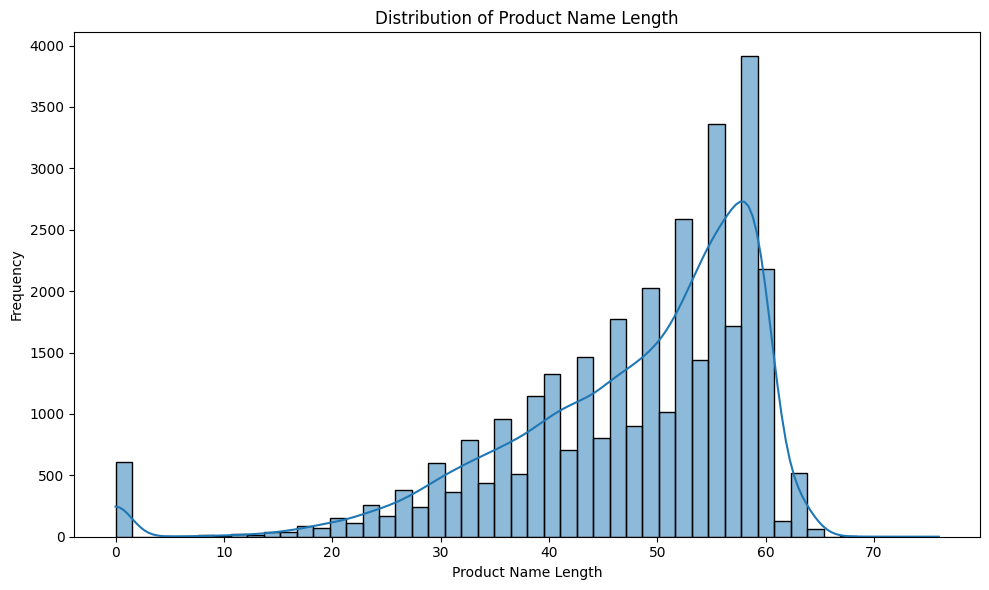

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(products_df['product_name_lenght'], bins=50, kde=True)
plt.title('Distribution of Product Name Length')
plt.xlabel('Product Name Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

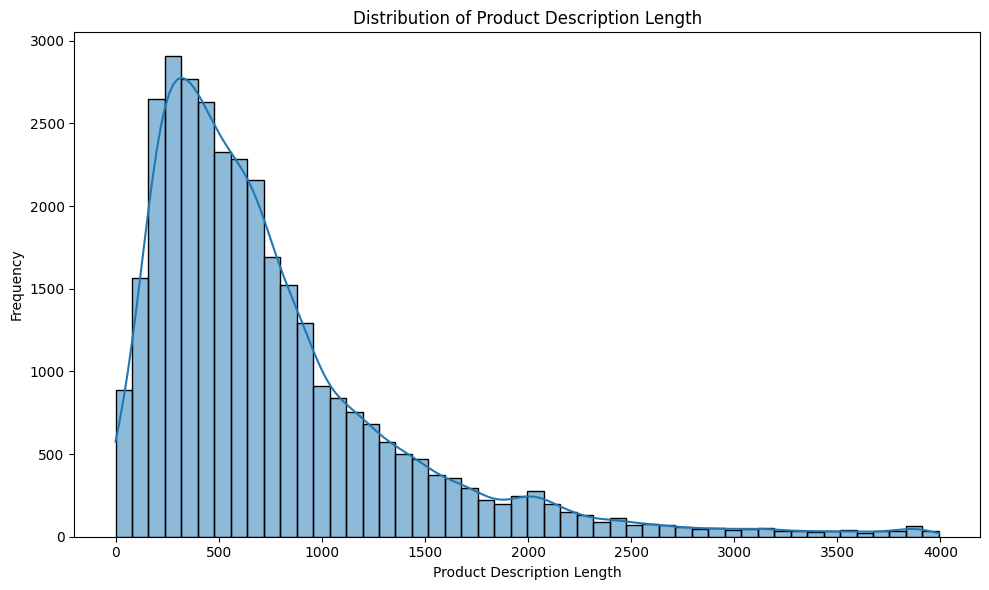

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(products_df['product_description_lenght'], bins=50, kde=True)
plt.title('Distribution of Product Description Length')
plt.xlabel('Product Description Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

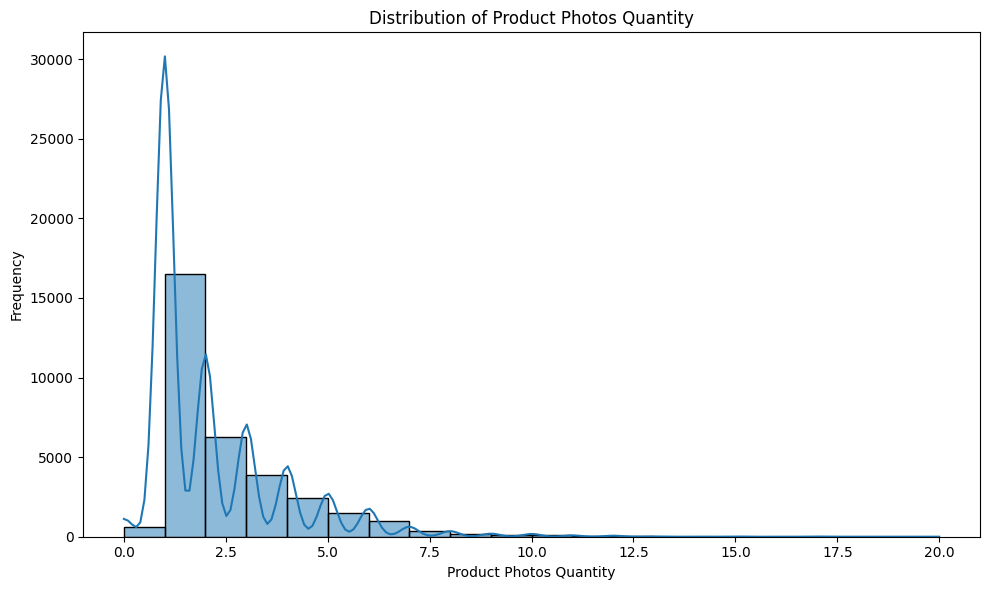

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(products_df['product_photos_qty'], bins=20, kde=True)
plt.title('Distribution of Product Photos Quantity')
plt.xlabel('Product Photos Quantity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

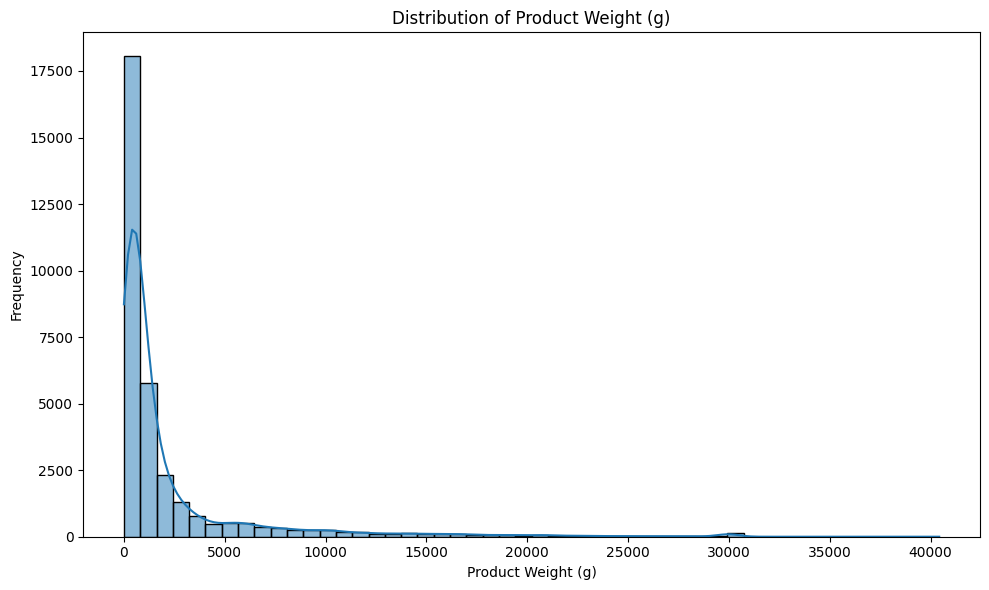

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(products_df['product_weight_g'], bins=50, kde=True)
plt.title('Distribution of Product Weight (g)')
plt.xlabel('Product Weight (g)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

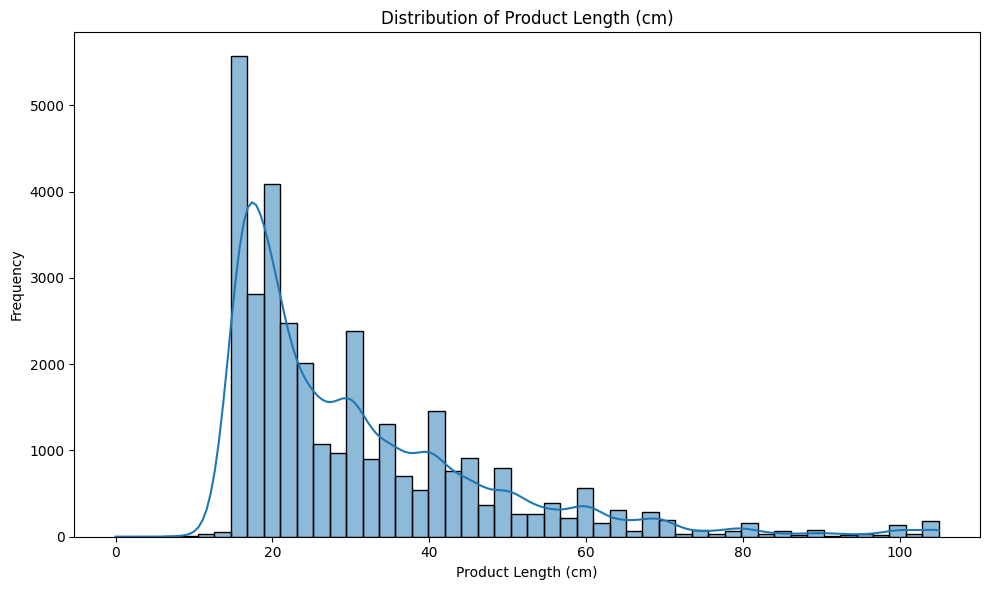

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(products_df['product_length_cm'], bins=50, kde=True)
plt.title('Distribution of Product Length (cm)')
plt.xlabel('Product Length (cm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

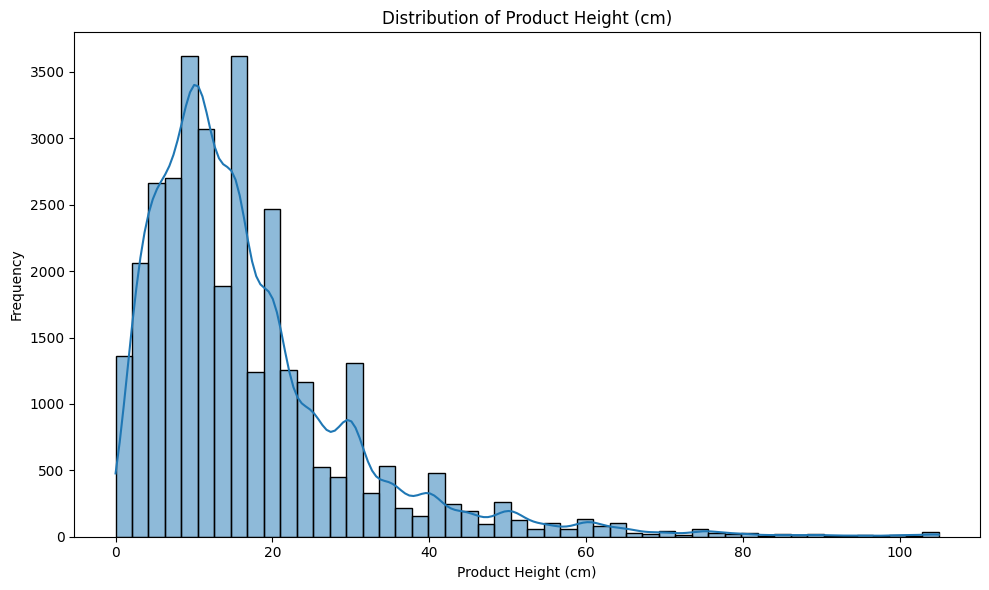

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(products_df['product_height_cm'], bins=50, kde=True)
plt.title('Distribution of Product Height (cm)')
plt.xlabel('Product Height (cm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

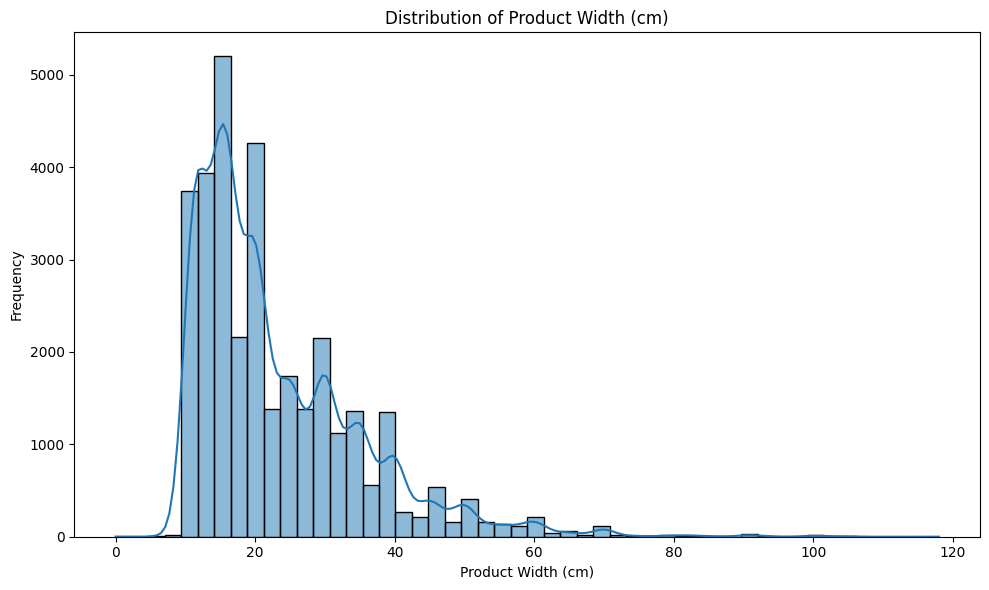

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(products_df['product_width_cm'], bins=50, kde=True)
plt.title('Distribution of Product Width (cm)')
plt.xlabel('Product Width (cm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Deteksi Pencilan Data Numerik (Boxplot)


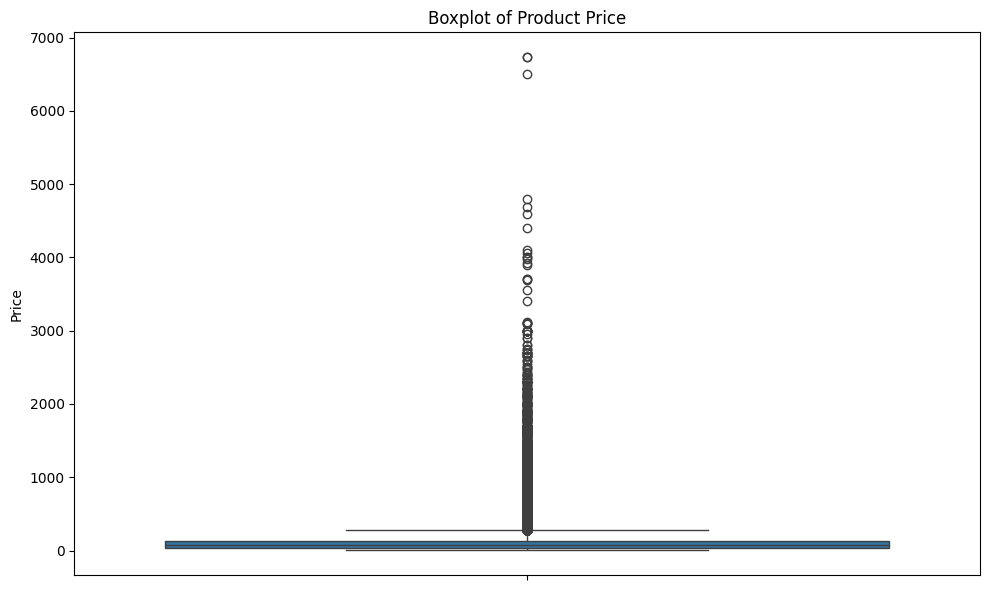

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=order_items_df['price'])
plt.title('Boxplot of Product Price')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

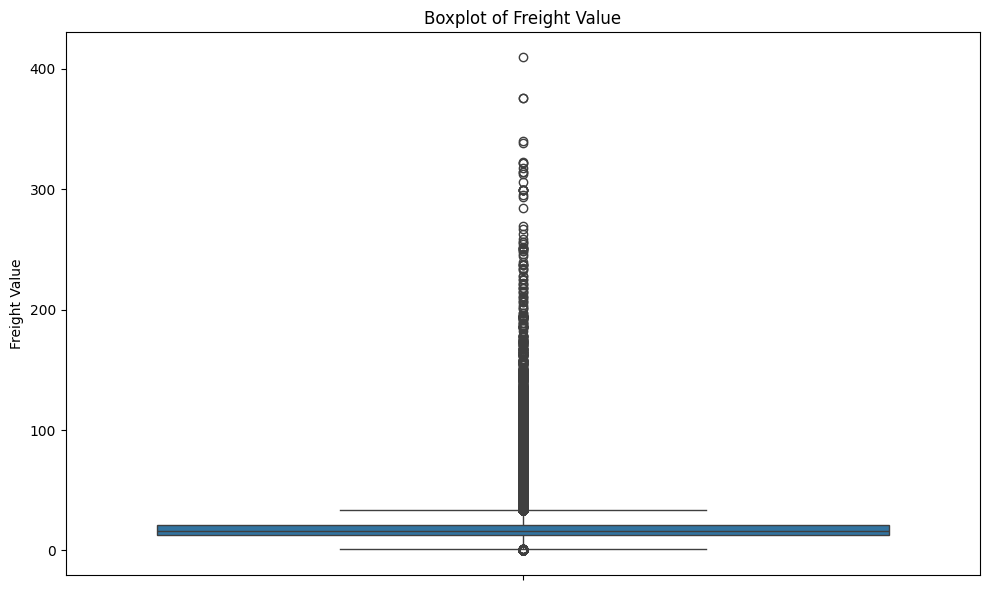

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=order_items_df['freight_value'])
plt.title('Boxplot of Freight Value')
plt.ylabel('Freight Value')
plt.tight_layout()
plt.show()

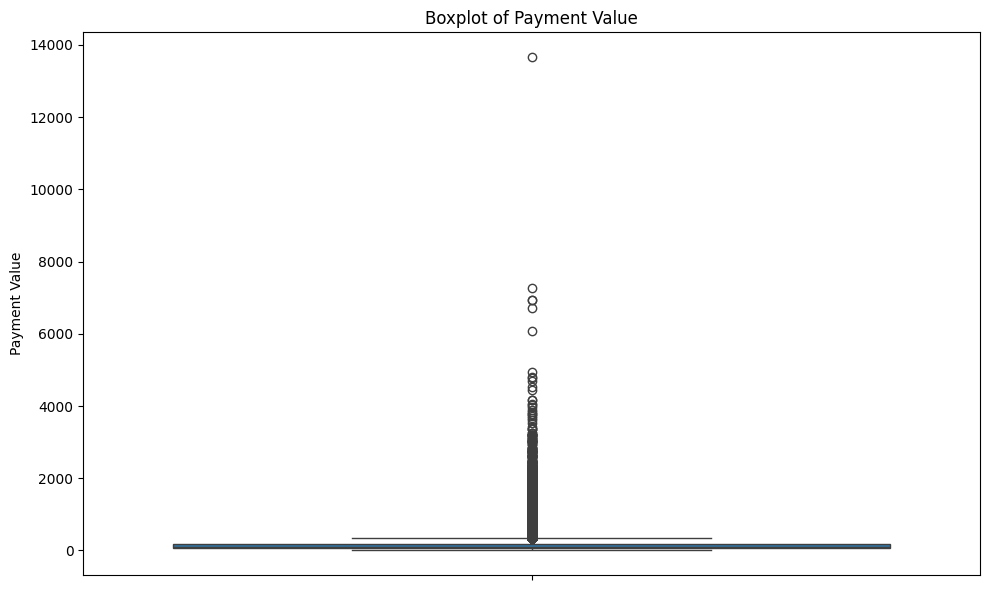

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=order_payments_df['payment_value'])
plt.title('Boxplot of Payment Value')
plt.ylabel('Payment Value')
plt.tight_layout()
plt.show()

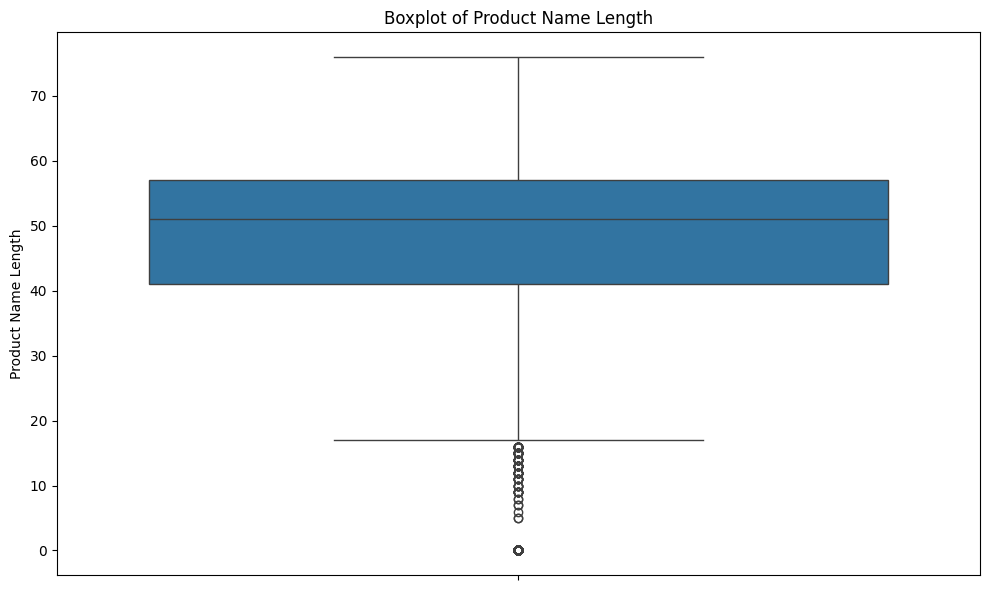

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=products_df['product_name_lenght'])
plt.title('Boxplot of Product Name Length')
plt.ylabel('Product Name Length')
plt.tight_layout()
plt.show()

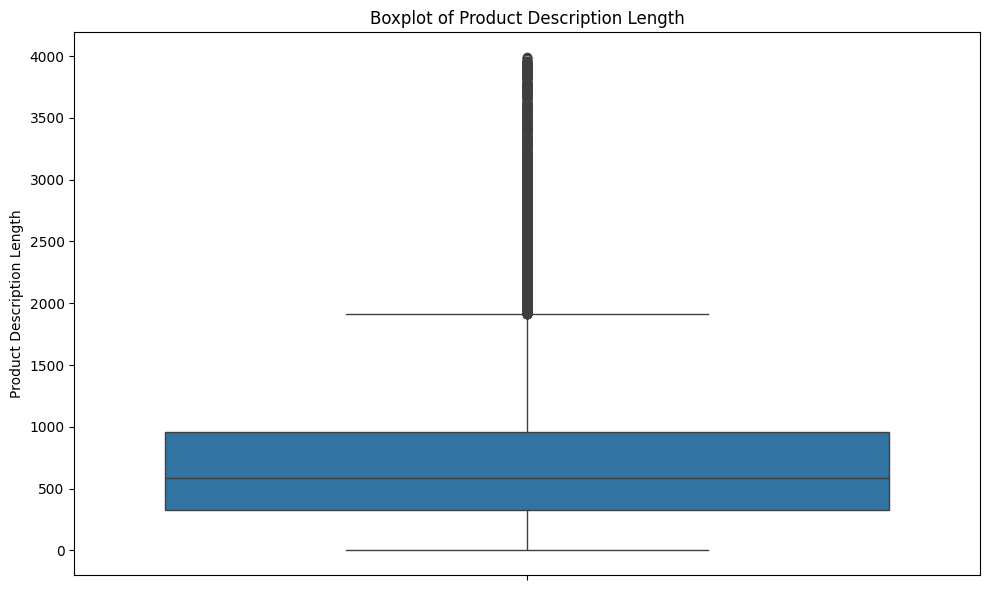

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=products_df['product_description_lenght'])
plt.title('Boxplot of Product Description Length')
plt.ylabel('Product Description Length')
plt.tight_layout()
plt.show()

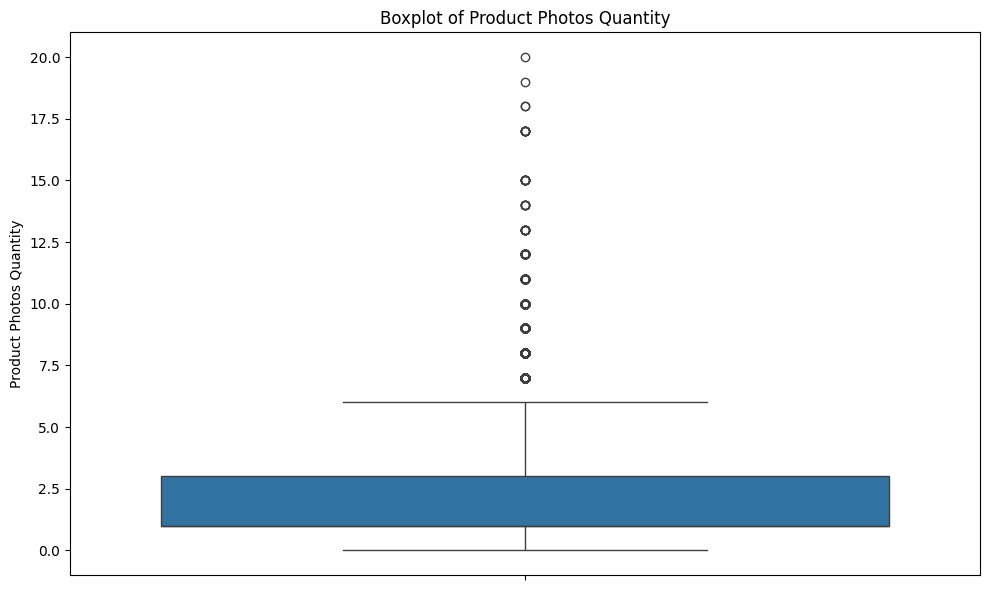

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=products_df['product_photos_qty'])
plt.title('Boxplot of Product Photos Quantity')
plt.ylabel('Product Photos Quantity')
plt.tight_layout()
plt.show()

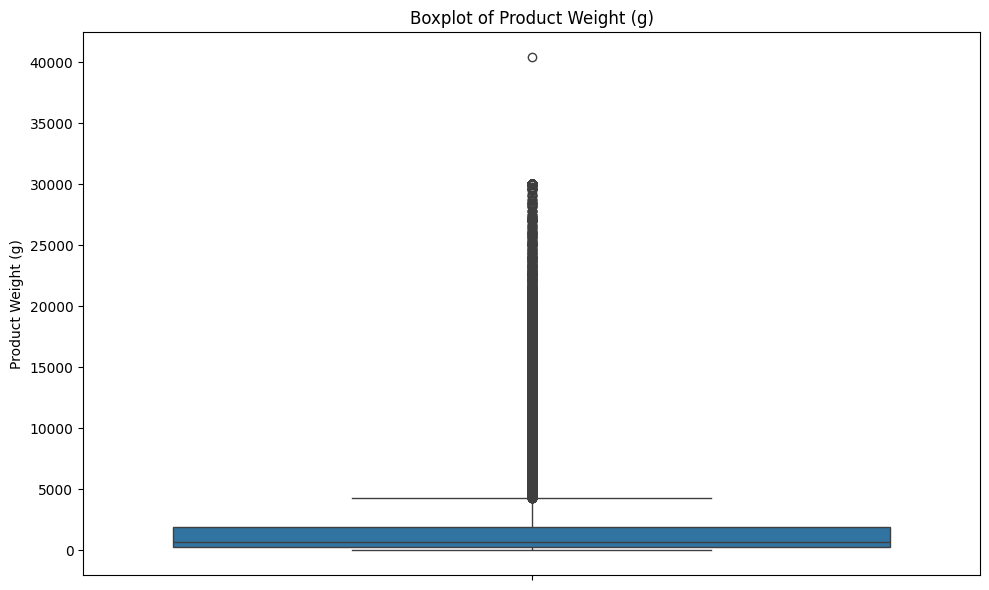

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=products_df['product_weight_g'])
plt.title('Boxplot of Product Weight (g)')
plt.ylabel('Product Weight (g)')
plt.tight_layout()
plt.show()

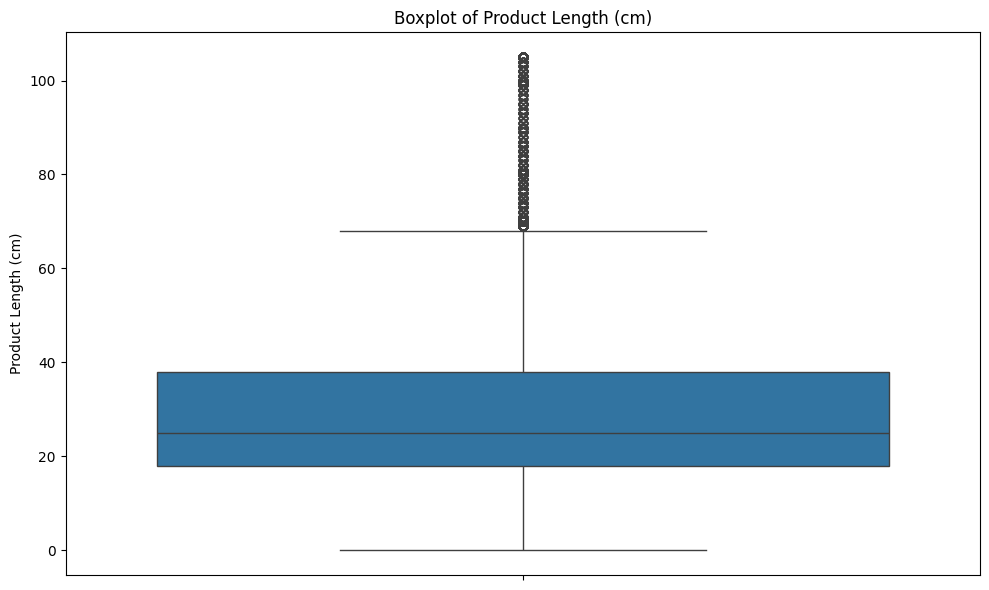

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=products_df['product_length_cm'])
plt.title('Boxplot of Product Length (cm)')
plt.ylabel('Product Length (cm)')
plt.tight_layout()
plt.show()

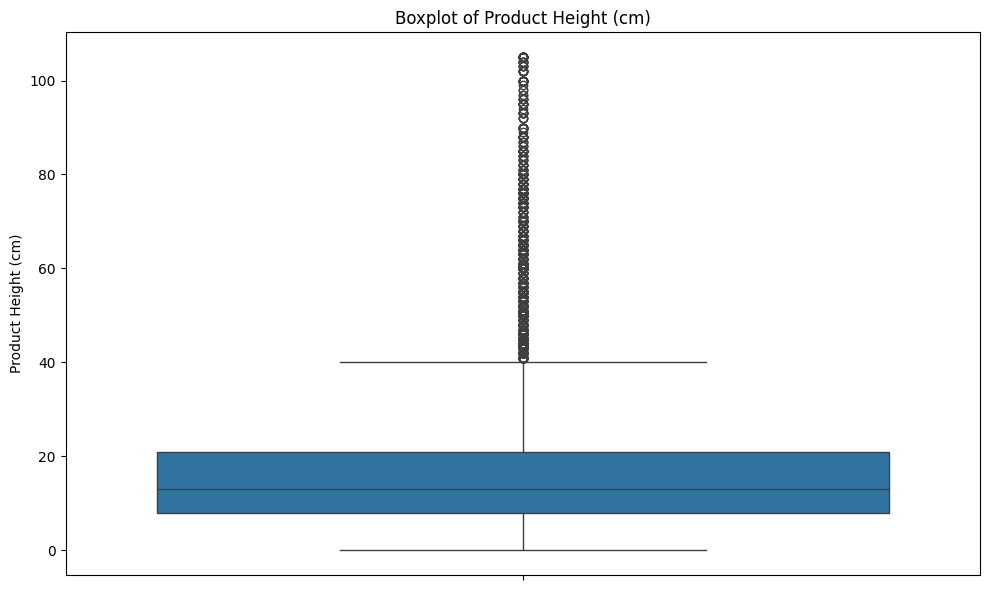

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=products_df['product_height_cm'])
plt.title('Boxplot of Product Height (cm)')
plt.ylabel('Product Height (cm)')
plt.tight_layout()
plt.show()

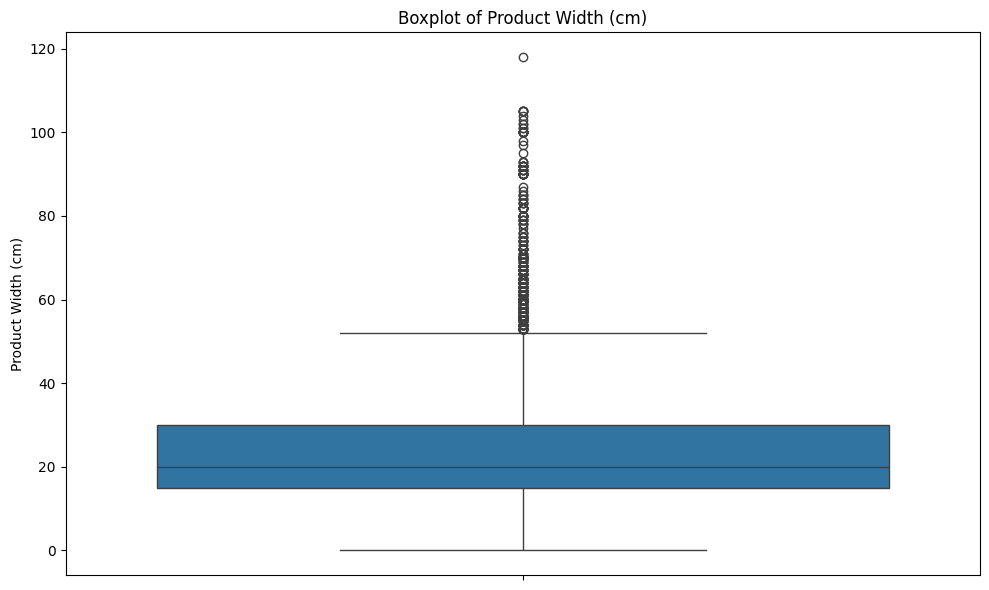

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=products_df['product_width_cm'])
plt.title('Boxplot of Product Width (cm)')
plt.ylabel('Product Width (cm)')
plt.tight_layout()
plt.show()

#### Distribusi Variabel Kategorikal


In [45]:
filtered_orders_df = orders_df[orders_df['order_status'] == 'delivered']

#merge filtered_orders_df with order_items_df to get product_id and price
orders_items_delivered_df = pd.merge(filtered_orders_df, order_items_df, on='order_id', how='inner')

# Then, merge with products_df to get product category name
orders_products_df = pd.merge(orders_items_delivered_df, products_df, on='product_id', how='inner')
orders_products_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [46]:
full_orders_df = pd.merge(orders_products_df, category_translation_df, on='product_category_name', how='inner')
full_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


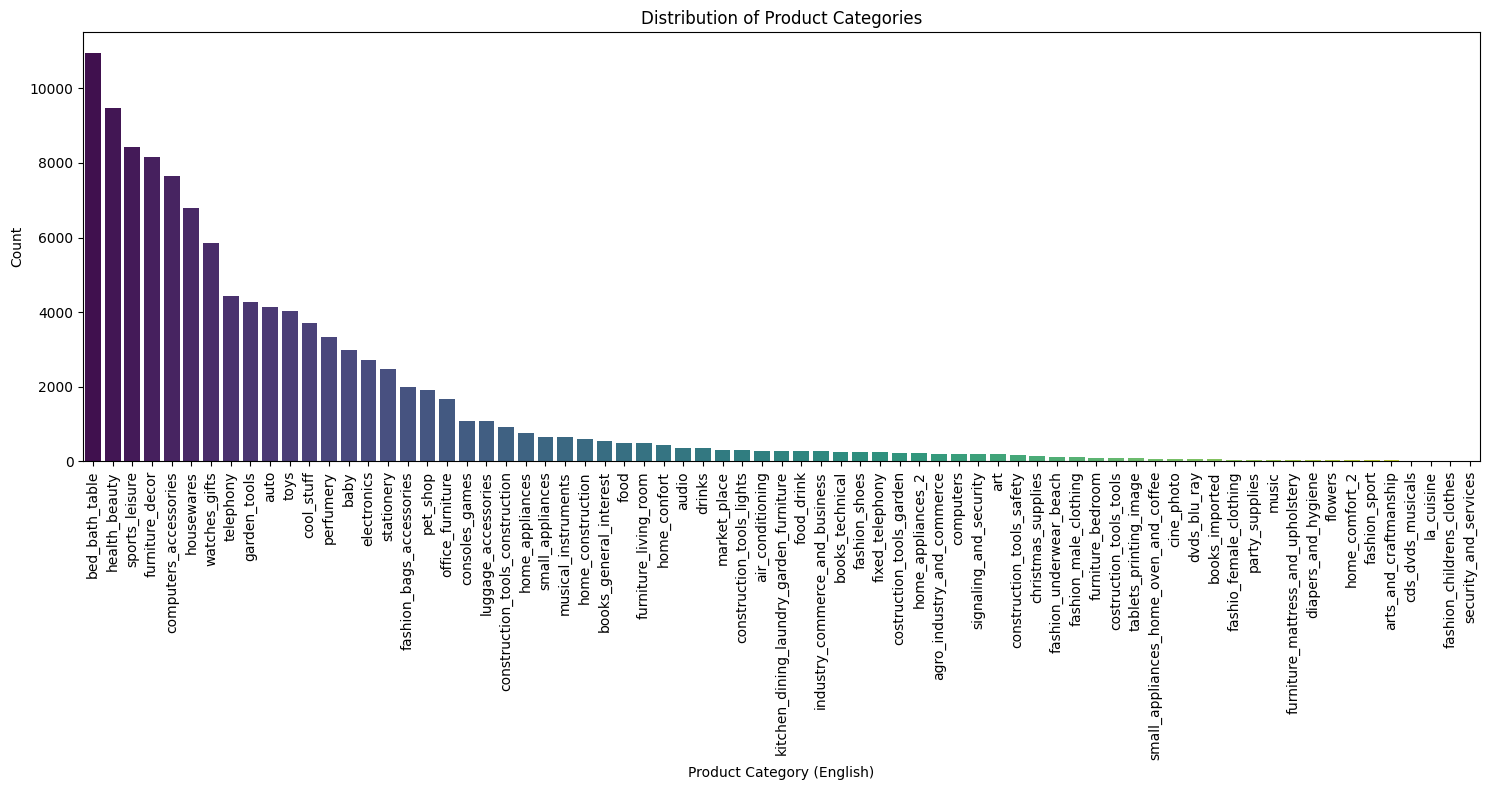

In [47]:
product_category_counts = full_orders_df['product_category_name_english'].value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(x=product_category_counts.index, y=product_category_counts.values, palette='viridis', hue=product_category_counts.index, legend=False)
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category (English)')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()

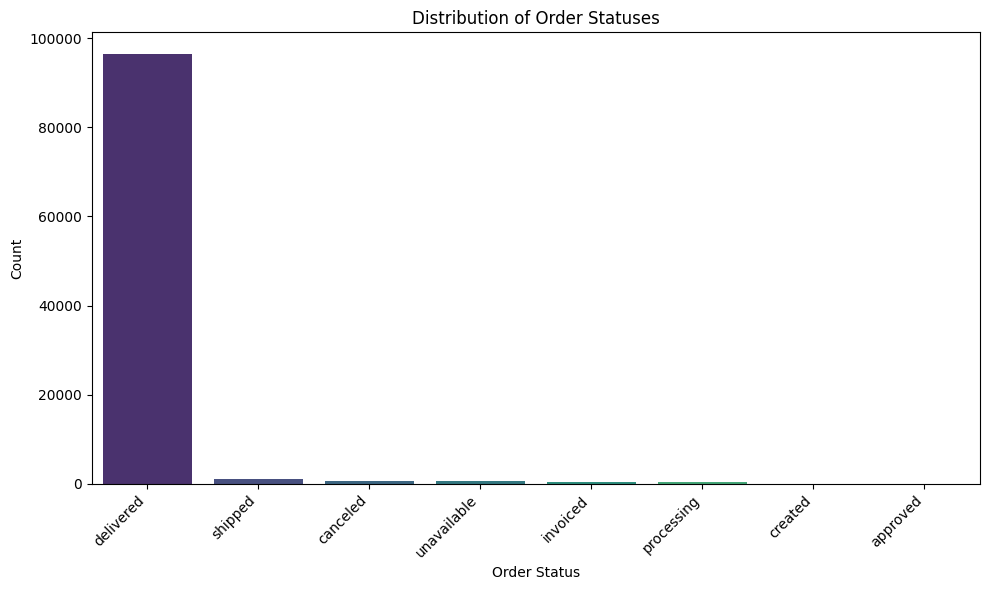

In [48]:
order_status_counts = orders_df['order_status'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette='viridis', hue=order_status_counts.index, legend=False)
plt.title('Distribution of Order Statuses')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3070099221.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette='viridis')


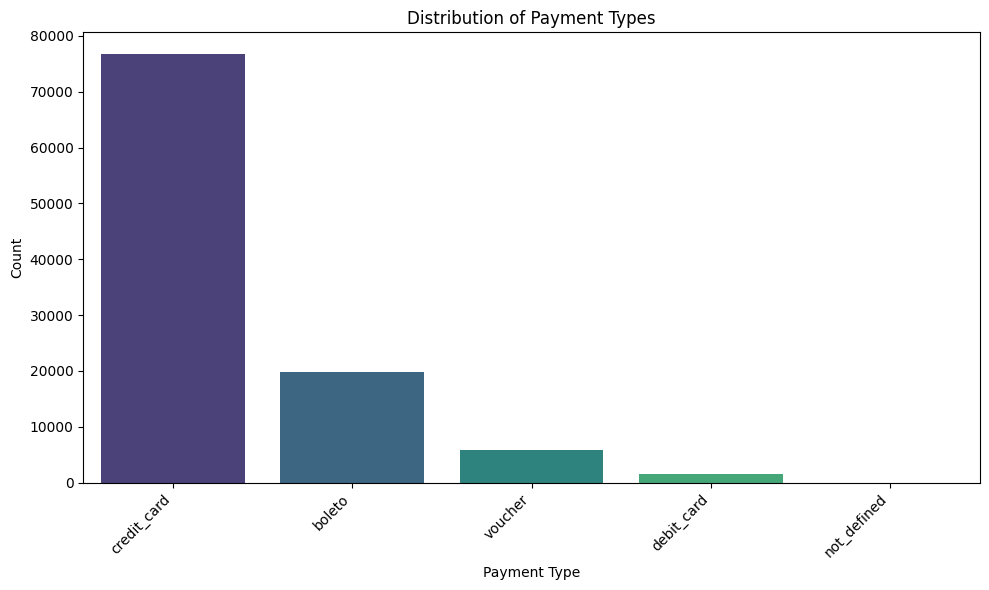

In [49]:
payment_type_counts = order_payments_df['payment_type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette='viridis')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Analisis Bivariat

#### Analisis Distribusi Skor Ulasan Pelanggan



In [50]:
review_score_counts = order_reviews_df['review_score'].value_counts().sort_index()

/tmp/ipython-input-2453253854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_score_counts.index, y=review_score_counts.values, palette='viridis')


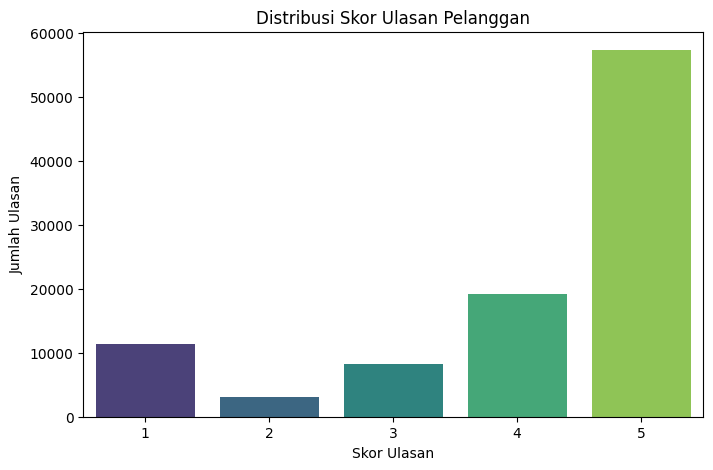

In [51]:
plt.figure(figsize=(8, 5))
sns.barplot(x=review_score_counts.index, y=review_score_counts.values, palette='viridis')
plt.title('Distribusi Skor Ulasan Pelanggan')
plt.xlabel('Skor Ulasan')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=0)
plt.show()

### Analisis Multivariat

#### Multivariate Analysis: Correlation Heatmap



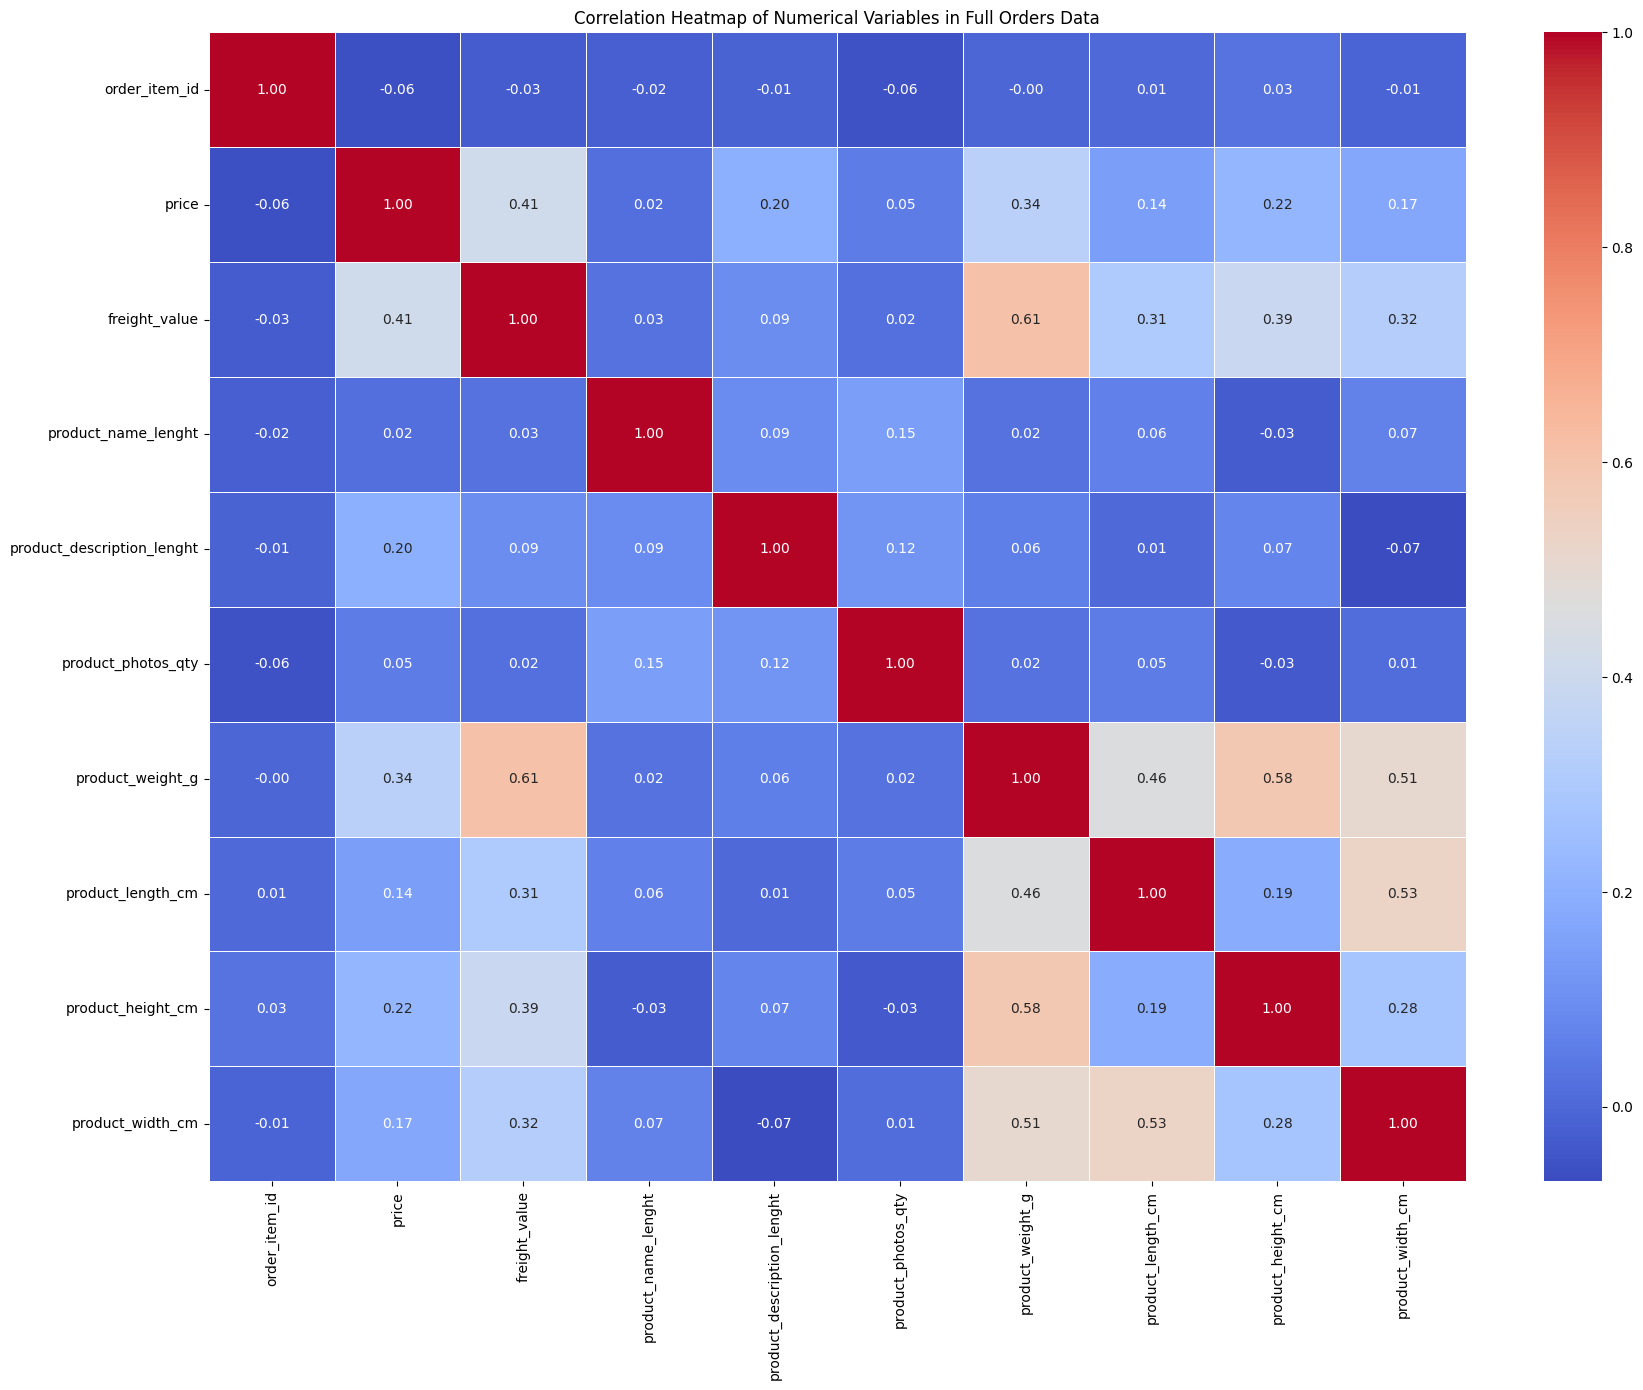

In [52]:
numerical_cols_full_orders = full_orders_df.select_dtypes(include=[np.number])

correlation_matrix = numerical_cols_full_orders.corr()

plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables in Full Orders Data')
plt.tight_layout()
plt.show()

### Insight:

1. Analisis Univariat:
  - Distribusi Data Numerik: Metrik keuangan utama seperti price, freight_value, dan payment_value menunjukkan distribusi miring ke kanan dengan banyak outlier, menunjukkan bahwa sebagian besar transaksi bernilai kecil, namun ada beberapa transaksi dengan nilai sangat besar. Dimensi produk (berat, panjang, tinggi, lebar) juga menunjukkan distribusi miring dan adanya outlier. Mayoritas produk memiliki 1 foto.
  - Distribusi Data Kategorikal: 'credit_card' adalah payment_type yang paling umum, diikuti oleh 'boleto'. Sebagian besar pesanan memiliki order_status 'delivered' (terkirim). Kategori produk juga bervariasi dalam distribusinya.

2. Analisis Bivariat & Multivariat:
  - Skor Ulasan Pelanggan: Mayoritas pelanggan memberikan skor ulasan 5, menunjukkan tingkat kepuasan yang tinggi. Skor 4 juga sering muncul, mengindikasikan pengalaman positif secara keseluruhan.
  - Peta Panas Korelasi: Peta panas korelasi telah dihasilkan untuk memahami hubungan antar variabel numerik dalam data pesanan lengkap.

## Visualization & Explanatory Analysis

### Analisis Total Pendapatan Bulanan (2017-2018)



In [53]:
orders_items_df = pd.merge(orders_df, order_items_df, on='order_id', how='inner')
orders_items_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [54]:
merged_df = pd.merge(orders_items_df, order_payments_df, on='order_id', how='inner')
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1,credit_card,3,179.12


In [55]:
filtered_orders_df = merged_df[(merged_df['order_purchase_timestamp'] >= '2017-01-01') & (merged_df['order_purchase_timestamp'] <= '2018-12-31')]
filtered_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1,credit_card,3,179.12


In [56]:
monthly_revenue_df = filtered_orders_df.set_index('order_purchase_timestamp')['payment_value'].resample('M').sum().reset_index()
monthly_revenue_df.columns = ['order_purchase_month', 'total_revenue']
monthly_revenue_df.head()

/tmp/ipython-input-2610733140.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue_df = filtered_orders_df.set_index('order_purchase_timestamp')['payment_value'].resample('M').sum().reset_index()


,order_purchase_month,total_revenue
0,2017-01-31,187779.41
1,2017-02-28,344134.79
2,2017-03-31,526961.66
3,2017-04-30,505665.53
4,2017-05-31,724504.55


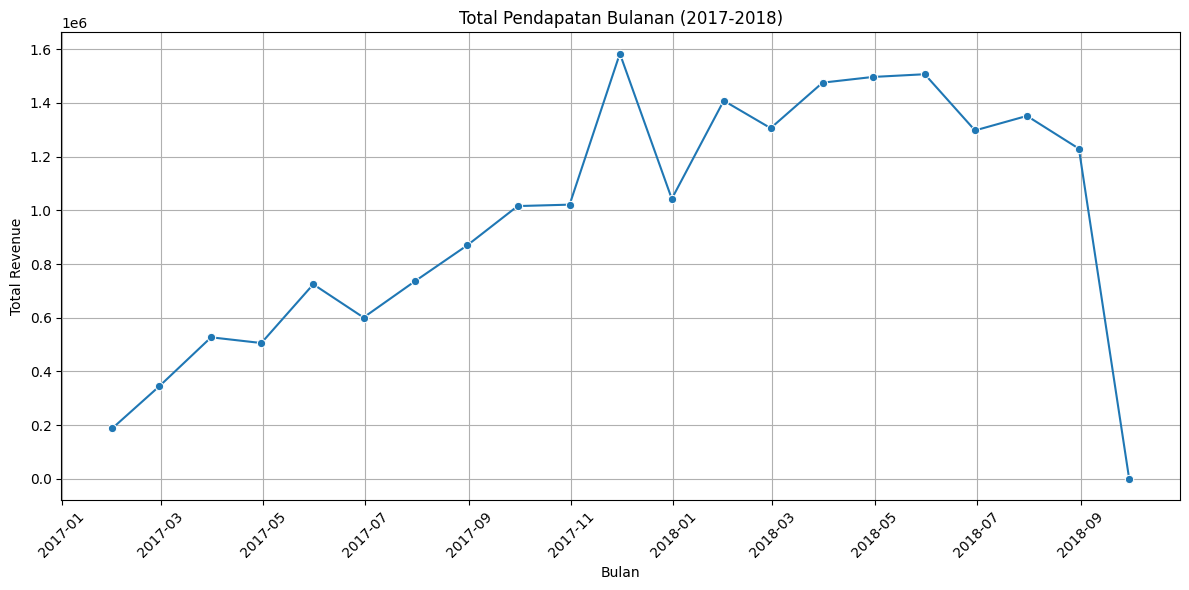

In [57]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_purchase_month', y='total_revenue', data=monthly_revenue_df, marker='o')
plt.title('Total Pendapatan Bulanan (2017-2018)')
plt.xlabel('Bulan')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Mengidentifikasi Kategori Produk Teratas Berdasarkan Pendapatan (2017-2018)


In [58]:
filtered_orders_df = orders_df[orders_df['order_status'] == 'delivered']

#merge filtered_orders_df with order_items_df to get product_id and price
orders_items_delivered_df = pd.merge(filtered_orders_df, order_items_df, on='order_id', how='inner')

# Then, merge with products_df to get product category name
orders_products_df = pd.merge(orders_items_delivered_df, products_df, on='product_id', how='inner')
orders_products_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [59]:
full_orders_df = pd.merge(orders_products_df, category_translation_df, on='product_category_name', how='inner')
full_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


In [60]:
category_revenue = full_orders_df.groupby('product_category_name_english')['price'].sum().reset_index()
category_revenue = category_revenue.sort_values(by='price', ascending=False)
category_revenue.head()

,product_category_name_english,price
43,health_beauty,1233131.72
70,watches_gifts,1166176.98
7,bed_bath_table,1023434.76
65,sports_leisure,954852.55
15,computers_accessories,888724.61


In [61]:
top_10_categories_revenue = category_revenue.head(10)
top_10_categories_revenue

,product_category_name_english,price
43,health_beauty,1233131.72
70,watches_gifts,1166176.98
7,bed_bath_table,1023434.76
65,sports_leisure,954852.55
15,computers_accessories,888724.61
39,furniture_decor,711927.69
49,housewares,615628.69
20,cool_stuff,610204.10
5,auto,578966.65
69,toys,471286.48


/tmp/ipython-input-3305572343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='price', data=top_10_categories_revenue, palette='viridis')


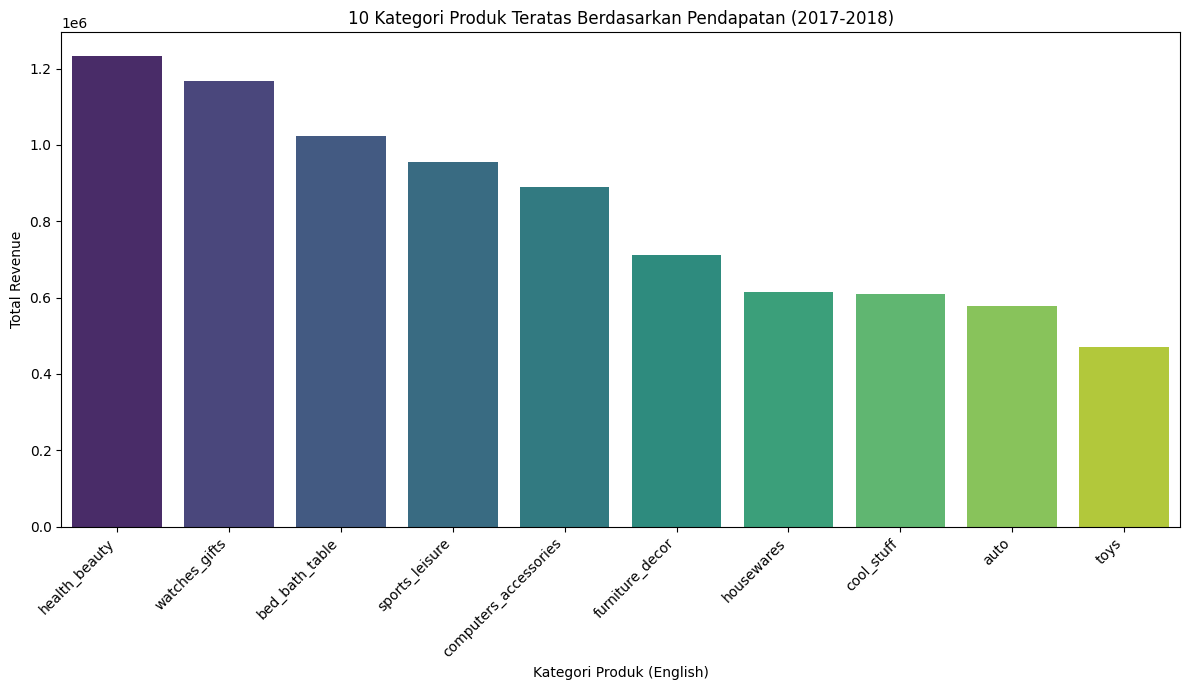

In [62]:
plt.figure(figsize=(12, 7))
sns.barplot(x='product_category_name_english', y='price', data=top_10_categories_revenue, palette='viridis')
plt.title('10 Kategori Produk Teratas Berdasarkan Pendapatan (2017-2018)')
plt.xlabel('Kategori Produk (English)')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Analisis Konsentrasi Pelanggan berdasarkan Negara Bagian (Akhir Tahun 2018)


In [63]:
customers_orders_df = pd.merge(customers_df, orders_df, on='customer_id', how='inner')
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [64]:
customers_orders_2018_df = customers_orders_df[(customers_orders_df['order_purchase_timestamp'] >= '2018-01-01') & (customers_orders_df['order_purchase_timestamp'] <= '2018-12-31')]
customers_orders_2018_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,2018-02-20 16:25:51,2018-03-05


In [65]:
customer_concentration_by_state = customers_orders_2018_df.groupby('customer_state')['customer_unique_id'].nunique().reset_index()
customer_concentration_by_state = customer_concentration_by_state.sort_values(by='customer_unique_id', ascending=False)
customer_concentration_by_state.columns = ['customer_state', 'unique_customers']
customer_concentration_by_state.head(10)

,customer_state,unique_customers
25,SP,23289
18,RJ,6400
10,MG,6042
22,RS,2715
17,PR,2698
23,SC,1868
4,BA,1741
6,DF,1182
7,ES,1039
8,GO,1030


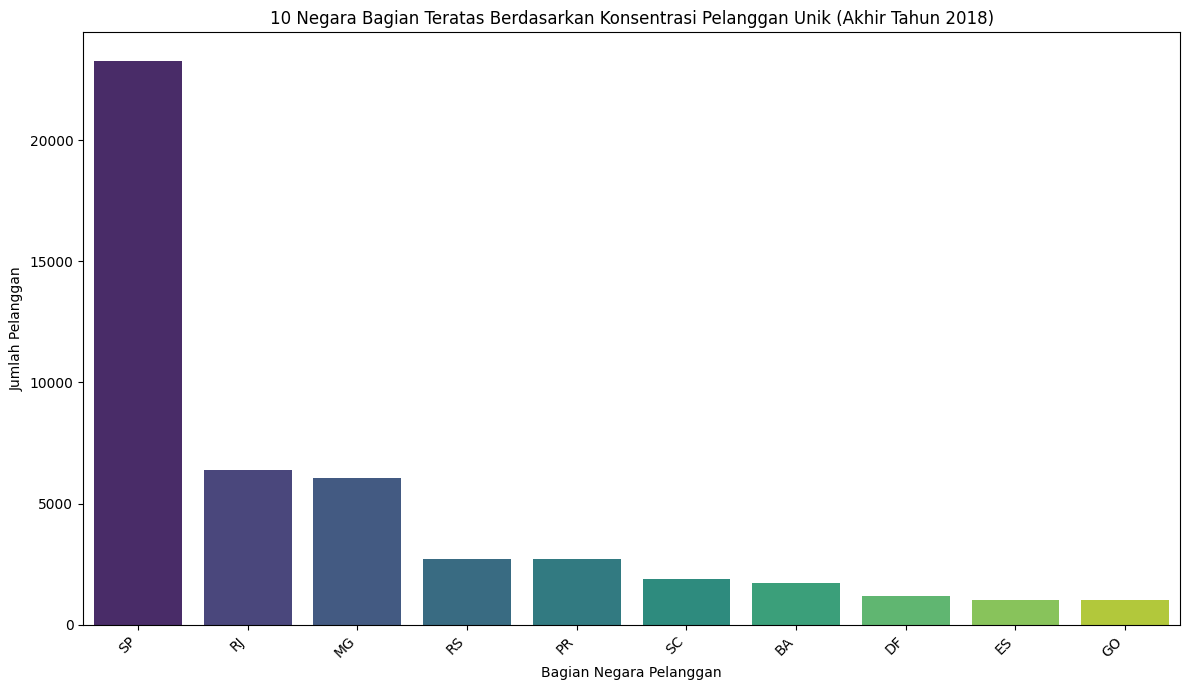

In [66]:
plt.figure(figsize=(12, 7))
sns.barplot(x='customer_state', y='unique_customers', data=customer_concentration_by_state.head(10), palette='viridis', hue='customer_state', legend=False)
plt.title('10 Negara Bagian Teratas Berdasarkan Konsentrasi Pelanggan Unik (Akhir Tahun 2018)')
plt.xlabel('Bagian Negara Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analisis Lanjutan

### Analisis RFM

In [67]:
rfm_df = pd.merge(customers_orders_df, order_payments_df, on='order_id', how='inner')
rfm_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,credit_card,8,252.25


In [68]:
snapshot_date = rfm_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

rfm_metrics = rfm_df.groupby('customer_unique_id').agg(
    Recency=('order_purchase_timestamp', lambda date: (snapshot_date - date.max()).days),
    Frequency=('order_id', 'nunique'),
    Monetary=('payment_value', 'sum')
).reset_index()

rfm_metrics.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19
2,0000f46a3911fa3c0805444483337064,586,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89


In [69]:
rfm_metrics['R_score'] = rfm_metrics['Recency'].rank(pct=True).apply(lambda x: int(np.floor(x * 5)) + 1)
rfm_metrics['F_score'] = rfm_metrics['Frequency'].rank(pct=True).apply(lambda x: int(np.ceil(x * 5)))
rfm_metrics['M_score'] = rfm_metrics['Monetary'].rank(pct=True).apply(lambda x: int(np.ceil(x * 5)))

# Adjust R_score for recency, where lower recency is better (higher score)
rfm_metrics['R_score'] = 6 - rfm_metrics['R_score']

rfm_metrics['RFM_score'] = rfm_metrics['R_score'].astype(str) + rfm_metrics['F_score'].astype(str) + rfm_metrics['M_score'].astype(str)

rfm_metrics.head()

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,4,3,4,434
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,4,3,1,431
2,0000f46a3911fa3c0805444483337064,586,1,86.22,1,3,2,132
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,2,3,1,231
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89,2,3,4,234


In [70]:
def assign_rfm_segment(df):
    if df['R_score'] >= 4 and df['F_score'] >= 4 and df['M_score'] >= 4:
        return 'Champions'
    elif df['R_score'] >= 3 and df['F_score'] >= 3 and df['M_score'] >= 3:
        return 'Loyal Customers'
    elif df['R_score'] >= 4 and df['F_score'] >= 3 and df['M_score'] >= 3:
        return 'Potential Loyalists'
    elif df['R_score'] >= 2 and df['F_score'] >= 2 and df['M_score'] >= 2:
        return 'At Risk'
    else:
        return 'Churned'

rfm_metrics['Segment'] = rfm_metrics.apply(assign_rfm_segment, axis=1)
rfm_metrics.head()

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,4,3,4,434,Loyal Customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,4,3,1,431,Churned
2,0000f46a3911fa3c0805444483337064,586,1,86.22,1,3,2,132,Churned
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,2,3,1,231,Churned
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89,2,3,4,234,At Risk


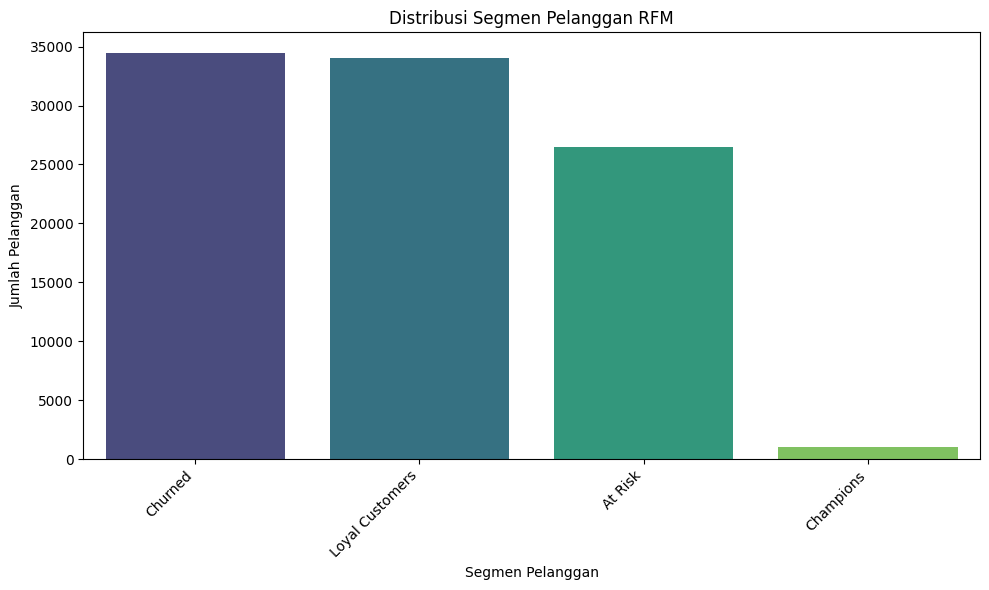

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

segment_counts = rfm_metrics['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Count', data=segment_counts, palette='viridis', hue='Segment', legend=False)
plt.title('Distribusi Segmen Pelanggan RFM')
plt.xlabel('Segmen Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Conclusion


### Pertanyaan 1: Analisis Kategori Produk Teratas berdasarkan Pendapatan (2017-2018):

- Kategori 'health_beauty' dan 'watches_gifts' adalah penyumbang pendapatan terbesar, menunjukkan popularitas tinggi dan potensi keuntungan dari produk-produk ini.
- Kategori 'bed_bath_table' dan 'sports_leisure' juga berkontribusi signifikan, menandakan permintaan yang kuat di segmen rumah tangga dan aktivitas.


### Pertanyaan 2: Analisis Konsentrasi Pelanggan berdasarkan Negara Bagian (Akhir 2018):

- Negara bagian São Paulo (SP) memiliki konsentrasi pelanggan unik tertinggi secara signifikan, diikuti oleh Rio de Janeiro (RJ) dan Minas Gerais (MG).
- Hal ini menunjukkan bahwa wilayah-wilayah ini merupakan pasar utama bagi e-commerce dan dapat menjadi target fokus untuk strategi pemasaran dan logistik.

### Hasil Analisis Tambahan

1. Analisis Distribusi Skor Ulasan Pelanggan:
- Mayoritas pelanggan memberikan skor ulasan 5, menunjukkan tingkat kepuasan yang tinggi secara keseluruhan (hampir menyentuh 60000).
- Skor 4 juga cukup sering muncul, sementara skor 1 dan 2 memiliki frekuensi yang jauh lebih rendah, mengindikasikan bahwa sebagian besar pengalaman pelanggan adalah positif.

2. Analisis Pendapatan Bulanan (2017-2018):
- Pendapatan menunjukkan tren peningkatan sepanjang tahun 2017 dan mencapai puncaknya pada akhir tahun, terutama di bulan November dan Desember.
- Tahun 2018 melanjutkan tren ini dengan pendapatan yang relatif stabil di awal tahun, kemudian menunjukkan lonjakan signifikan di pertengahan hingga akhir tahun, meskipun data untuk akhir 2018 mungkin tidak lengkap.

3. Analisis RFM:
- Analisis RFM mengidentifikasi berbagai segmen pelanggan, di mana 'Champions' adalah pelanggan paling berharga (baru bertransaksi, sering, dan menghabiskan banyak uang).
- 'Loyal Customers' juga merupakan segmen penting yang sering berinteraksi dan berkontribusi terhadap pendapatan.
- Segmen 'At Risk' dan 'Churned' menunjukkan pelanggan yang mungkin memerlukan perhatian khusus atau kampanye retensi untuk mencegah kehilangan lebih lanjut.

4. Distribusi Data Numerik (Analisis Univariat):

* Metrik keuangan utama seperti `price`, `freight_value`, dan `payment_value` menunjukkan distribusi miring ke kanan dengan banyak outlier, yang menunjukkan pola umum di mana sebagian besar transaksi kecil tetapi beberapa transaksi sangat besar.

* Dimensi produk (`product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`) dan panjang kolom teks (`product_name_lenght`, `product_description_lenght`) juga menunjukkan distribusi miring dan adanya outlier. Beberapa dimensi produk (`product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`) menunjukkan nilai minimum 0, yang mungkin mengindikasikan informasi produk yang tidak lengkap atau jenis produk tertentu.
* Distribusi `product_photos_qty` menunjukkan bahwa sebagian besar produk memiliki 1 foto, dengan frekuensi yang menurun untuk foto yang lebih banyak, dan outlier hingga 20 foto.

5. Distribusi Data Kategorikal (Analisis Univariat):
* `payment_type` yang paling umum adalah "credit_card", diikuti oleh "boleto".

* Sebagian besar pesanan memiliki `order_status` "terkirim".

* Kategori produk (`product_category_name_english`) menunjukkan distribusi yang bervariasi, dengan beberapa kategori jauh lebih populer daripada yang lain.

6. Analisis Multivariat (Peta Panas Korelasi):
* Peta panas korelasi dihasilkan untuk semua kolom numerik dalam `full_orders_df` yang digabungkan untuk memvisualisasikan hubungan antar variabel, meskipun korelasi kuat tertentu tidak secara eksplisit dirinci dalam output yang diberikan.

## Export Data Untuk Streamlit

Siapkan dan simpan sisa dataframe agregat (top product categories, top customer states) ke dalam file CSV terpisah untuk digunakan dalam aplikasi Streamlit.

In [72]:
top_10_categories_revenue.to_csv('top_product_categories_revenue.csv', index=False)
print("DataFrame 'top_10_categories_revenue' exported to 'top_product_categories_revenue.csv'")

DataFrame 'top_10_categories_revenue' exported to 'top_product_categories_revenue.csv'


In [73]:
customer_concentration_by_state.to_csv('customer_concentration_by_state.csv', index=False)
print("DataFrame 'customer_concentration_by_state' exported to 'customer_concentration_by_state.csv'")

DataFrame 'customer_concentration_by_state' exported to 'customer_concentration_by_state.csv'


In [74]:
monthly_revenue_df.to_csv('monthly_revenue.csv', index=False)
print("DataFrame 'monthly_revenue_df' exported to 'monthly_revenue.csv'")

DataFrame 'monthly_revenue_df' exported to 'monthly_revenue.csv'
